# TUTORIAL: Train YOLOv5 on custom dataset

*A guide to train YOLOv5 from scratch through an AI Notebook.*

### **USE CASE:** Train YOLOv5 model on custom dataset (COCO dataset)

## Introduction

The purpose of this tutorial is to show how it is possible to train YOLOv5 to recognise objects. YOLOv5 is an object detection algorithm. Although closely related to image classification, object detection performs image classification on a more precise scale. Object detection locates and categorises features in images.

It is based on the YOLOv5 repository by <a href="https://github.com/ultralytics/yolov5">Ultralytics</a>.

## Requirements

This notebook shows training on your own custom objects.

### Train your own dataset

To train your own dataset, you can refer to the following steps:

- **Collecte your training images**: to get your object detector off the ground, you need to first collect training images.

⚠️ You must pay attention to the format of the images in your dataset. Think of putting your images in **.jpg** format!

- **Define the number of classes**: make sure that the number of objects in each class is uniformly distributed.

- **Annotation of your training images**: to train our object detector, you need to supervise its training using bounding box annotations. You have to draw a box around each object you want the detector to see and label each box with the object class you want the detector to predict.

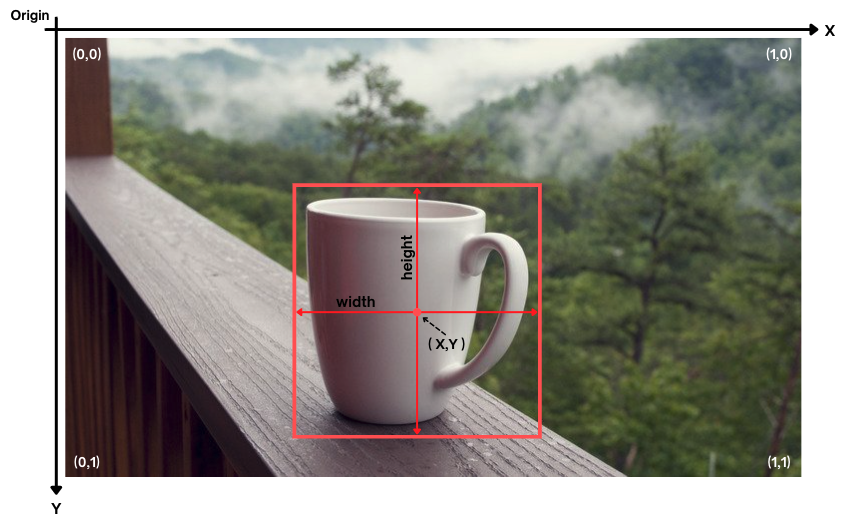

↪️ Labels should be written as follows:

*num_label*: label (or class) number. If you have *n* classes, the label number will be between *0* and *n-1*
   
*X* and *Y*: correspond to the coordinates of the centre of the box 
   
*width*: width of the box
   
*height*: height of the box

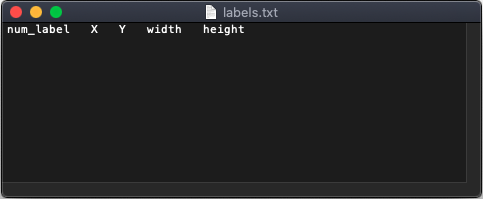

If an image contains several labels, write a line for each label in the same **.txt** file.

- **Split your dataset**: choose how you want to disperse your data (for example, keep 80% data in the training set and 20% in the validation set).

⚠️ Images and labels must have the same name.

*Exemple:*

```
data/train/images/img0.jpg  # image
data/train/labels/img0.txt  # label
```

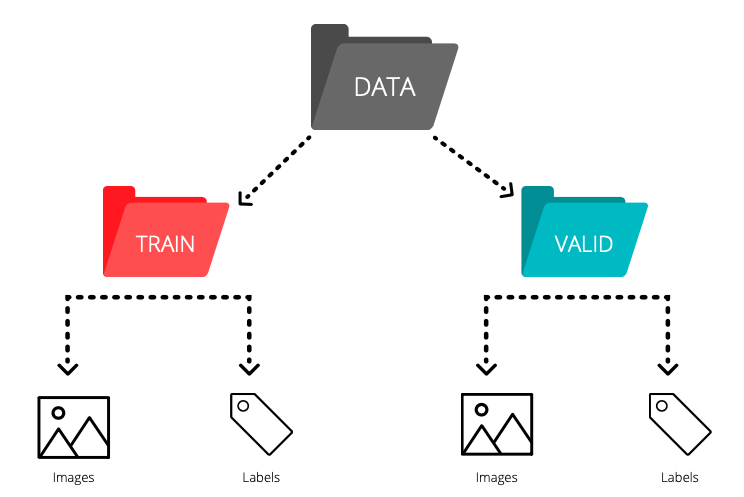

- **Set up files and directory structure**: to train the YOLOv5 model, you need to add a YAML file to describe the parameters of your dataset. You can refer to the following YAML file and modify it as needed.

``` 
# you have specify the train and validation files
train: /workspace/data/train/images
val: /workspace/data/valid/images

nc: 80
names: ['aeroplane', 'apple', 'backpack', 'banana', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'cow', 'cup', 'diningtable', 'dog', 'donut', 'elephant', 'fire hydrant', 'fork', 'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse', 'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave', 'motorbike', 'mouse', 'orange', 'oven', 'parking meter', 'person', 'pizza', 'pottedplant', 'refrigerator', 'remote', 'sandwich', 'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'sofa', 'spoon', 'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'toaster', 'toilet', 'toothbrush', 'traffic light', 'train', 'truck', 'tvmonitor', 'umbrella', 'vase', 'wine glass', 'zebra'] 
```

When your data is ready, all you have to do is clone the repository for YOLOv5. Then you can train the YOLOv5 model of your choice on your data.

### Example of the COCO dataset

For this tutorial, the training of the YOLOv5m model will be based on the COCO dataset.

```
OVHcloud disclaims to the fullest extent authorized by law all warranties, whether express or implied, including any implied warranties of title, non-infringement, quiet enjoyment, integration, merchantability or fitness for a particular purpose regarding the use of the COCO dataset in the context of this notebook. The user shall fully comply with the terms of use that appears on the database website (https://cocodataset.org/).

```

**But what is the COCO dataset ?**

COCO is a large-scale object detection, segmentation, and also captioning dataset. COCO has several features:

- Object segmentation
- Recognition in context
- Superpixel stuff segmentation
- 330K images
- 1.5 million object instances
- 80 object categories
- 91 stuff categories
- 5 captions per image
- 250 000 people with keypoints

⚠️ If you **do not have your own dataset**, you can use the COCO dataset to start your first training with YOLOv5 by running the following command.

### Download the COCO dataset

The COCO Dataset is available on <a href="https://public.roboflow.com/object-detection/microsoft-coco-subset">Roboflow</a>.

If you want to use this **Public Dataset** on the tutorial, follow the next requirements:

- create a Roboflow account
- click on `Download` in order to download the dataset
- select`YOLO v5 PyTorch` format
- choose the method `show download code`

You will get a URL (`<dataset_url>`) that will allow you to download your dataset directly inside the notebook.

Finally, replace `<dataset_url>` with yours in the following command:

In [1]:
# go to the folder corresponding to your object container
!mkdir -p /workspace/data
%cd /workspace/data
!curl -L "<dataset_url>" > roboflow.zip; unzip -q roboflow.zip; rm roboflow.zip

/workspace/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2140      0 --:--:-- --:--:-- --:--:--  2140
100 6064M  100 6064M    0     0  28.0M      0  0:03:35  0:03:35 --:--:-- 39.2M   0  24.1M      0  0:04:11  0:00:26  0:03:45 27.0M


⚠️ If you use the **COCO dataset**, you have to modify the *data.yaml* file. 

Follow this path: `workspace` -> `data` -> `data.yaml`

Then you need to **change the path** to :

`train: /workspace/data/train/images`

`val: /workspace/data/valid/images`

=> You are now ready to start coding!

## Code

The different steps are as follow :

- Install YOLOv5 dependencies
- Download the COCO dataset
- Import dependencies and check GPU availability
- Define YOLOv5 model
- Run YOLOv5 training
- Evaluate YOLOv5 performance on COCO dataset
- Graphs and functions explanation
- Visualize training data with labels
- Run YOLOv5 inference on test images
- Export trained weights for future inference

### Install YOLOv5 dependencies

In [2]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5 /workspace/yolov5 # clone repo

Cloning into '/workspace/yolov5'...
remote: Enumerating objects: 15897, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15897 (delta 4), reused 16 (delta 4), pack-reused 15880
Receiving objects: 100% (15897/15897), 14.63 MiB | 6.62 MiB/s, done.
Resolving deltas: 100% (10899/10899), done.


In [3]:
# YOLOv5 path
%cd /workspace/yolov5

/workspace/yolov5


In [ ]:
# install dependencies as necessary
!pip install -r requirements.txt

### Import dependencies and check GPU availability

In [5]:
import torch
import os

# to display images
from IPython.display import Image, clear_output

In [6]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.1+cu117 _CudaDeviceProperties(name='Tesla V100S-PCIE-32GB', major=7, minor=0, total_memory=32500MB, multi_processor_count=80)


### Define YOLOv5 model

The chosen model is: YOLOv5s

In [9]:
# define number of classes based on data.yaml (here we got 80)
import yaml

# go to the directory where the data.yaml file is located
%cd /workspace/data
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

/workspace/data


In [10]:
# model configuration used for the tutorial: yolov5s
%cat /workspace/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [11]:
# customize iPython writefile
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [12]:
%%writetemplate /workspace/yolov5/models/custom_yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.67  # model depth multiple
width_multiple: 0.75  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

### Run YOLOv5 training

**Parameters definitions:**

- img: refers to the input images size.
- batch: refers to the batch size (number of training examples utilized in one iteration).
- epochs: refers to the number of training epochs. An epoch corresponds to one cycle through the full training dataset.
- data: refers to the path to the yaml file.
- cfg: define the model configuration.

In [13]:
# train yolov5s on custom data for 100 epochs
# time its performance
%time
%cd /workspace/yolov5/
!python train.py --img 416 --batch 16 --epochs 1 --data '/workspace/data/data.yaml' --cfg '/workspace/yolov5/models/custom_yolov5s.yaml' --weights '' --name yolov5s_results

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 17.6 µs
/workspace/yolov5
train: weights=, cfg=/workspace/yolov5/models/custom_yolov5s.yaml, data=/workspace/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-207-gdf48c20 Python-3.9.5 torch-2.0.1+cu117 CUDA:0 (Tesla V100S-PCIE-32GB, 32501MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum

Here we have an example of training on the one epoch.

### Evaluate YOLOv5 performance on COCO dataset

Training losses and performance metrics are saved into a folder named this yolov5s_results. The results file is plotted as a png image after training.

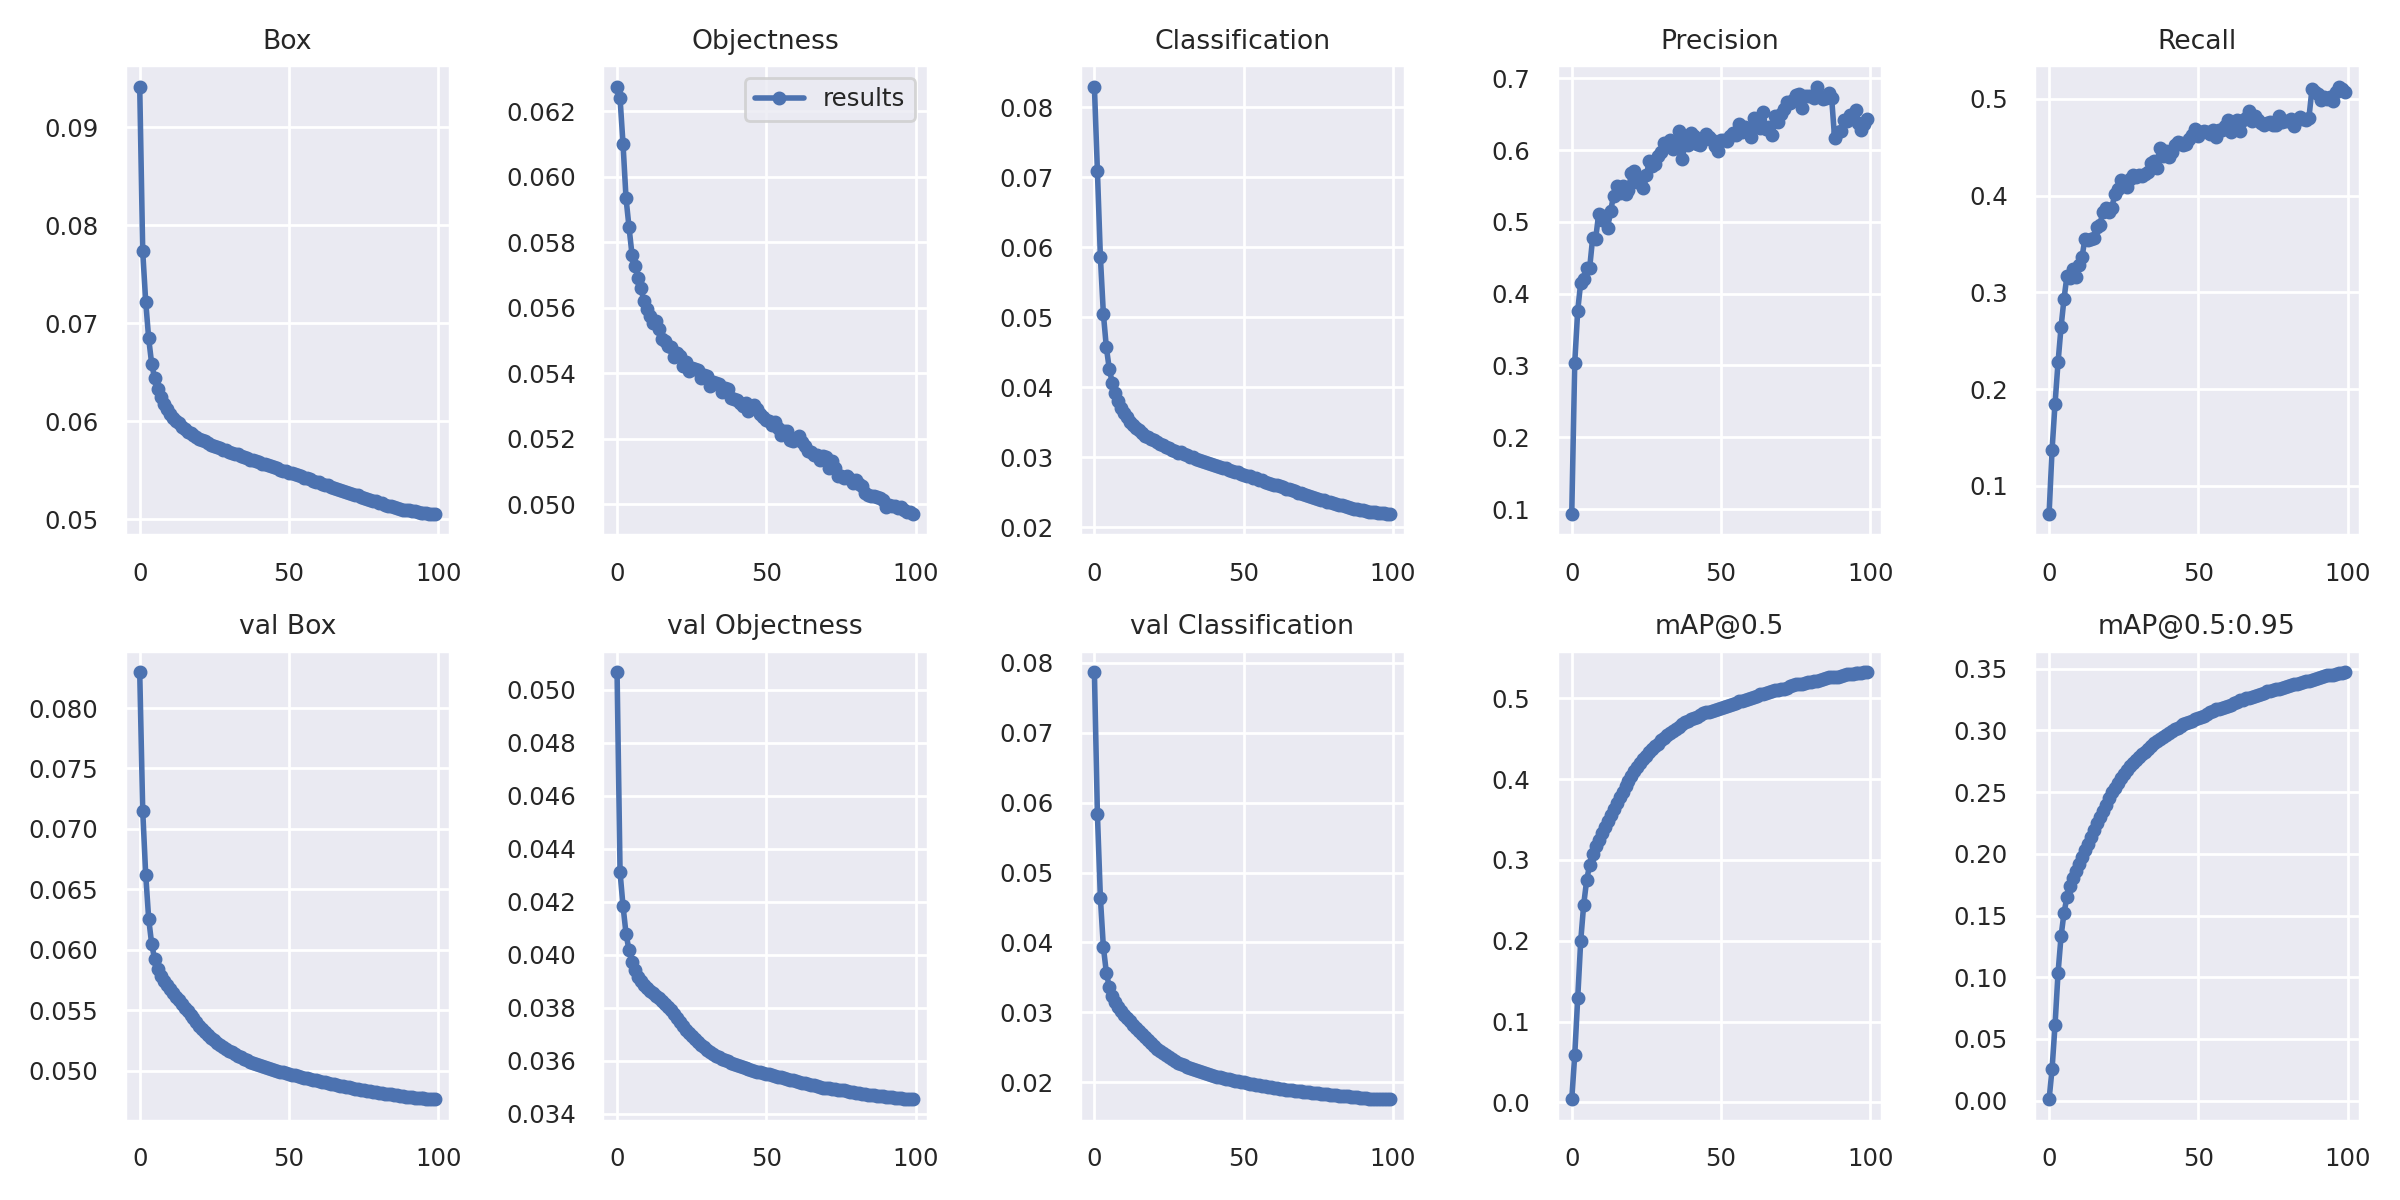

In [11]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/workspace/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

### Graphs and functions explanation
**Loss functions:**

*For the training set:*

- Box: loss due to a box prediction not exactly covering an object.
- Objectness: loss due to a wrong box-object IoU **[1]** prediction.
- Classification: loss due to deviations from predicting ‘1’ for the correct classes and ‘0’ for all the other classes for the object in that box.

*For the valid set (the same loss functions as for the training data):*

- val Box
- val Objectness
- val Classification

**Precision & Recall:**

- Precision: measures how accurate are the predictions. It is the percentage of your correct predictions
- Recall: measures how good it finds all the positives

*How to calculate Precision and Recall ?*

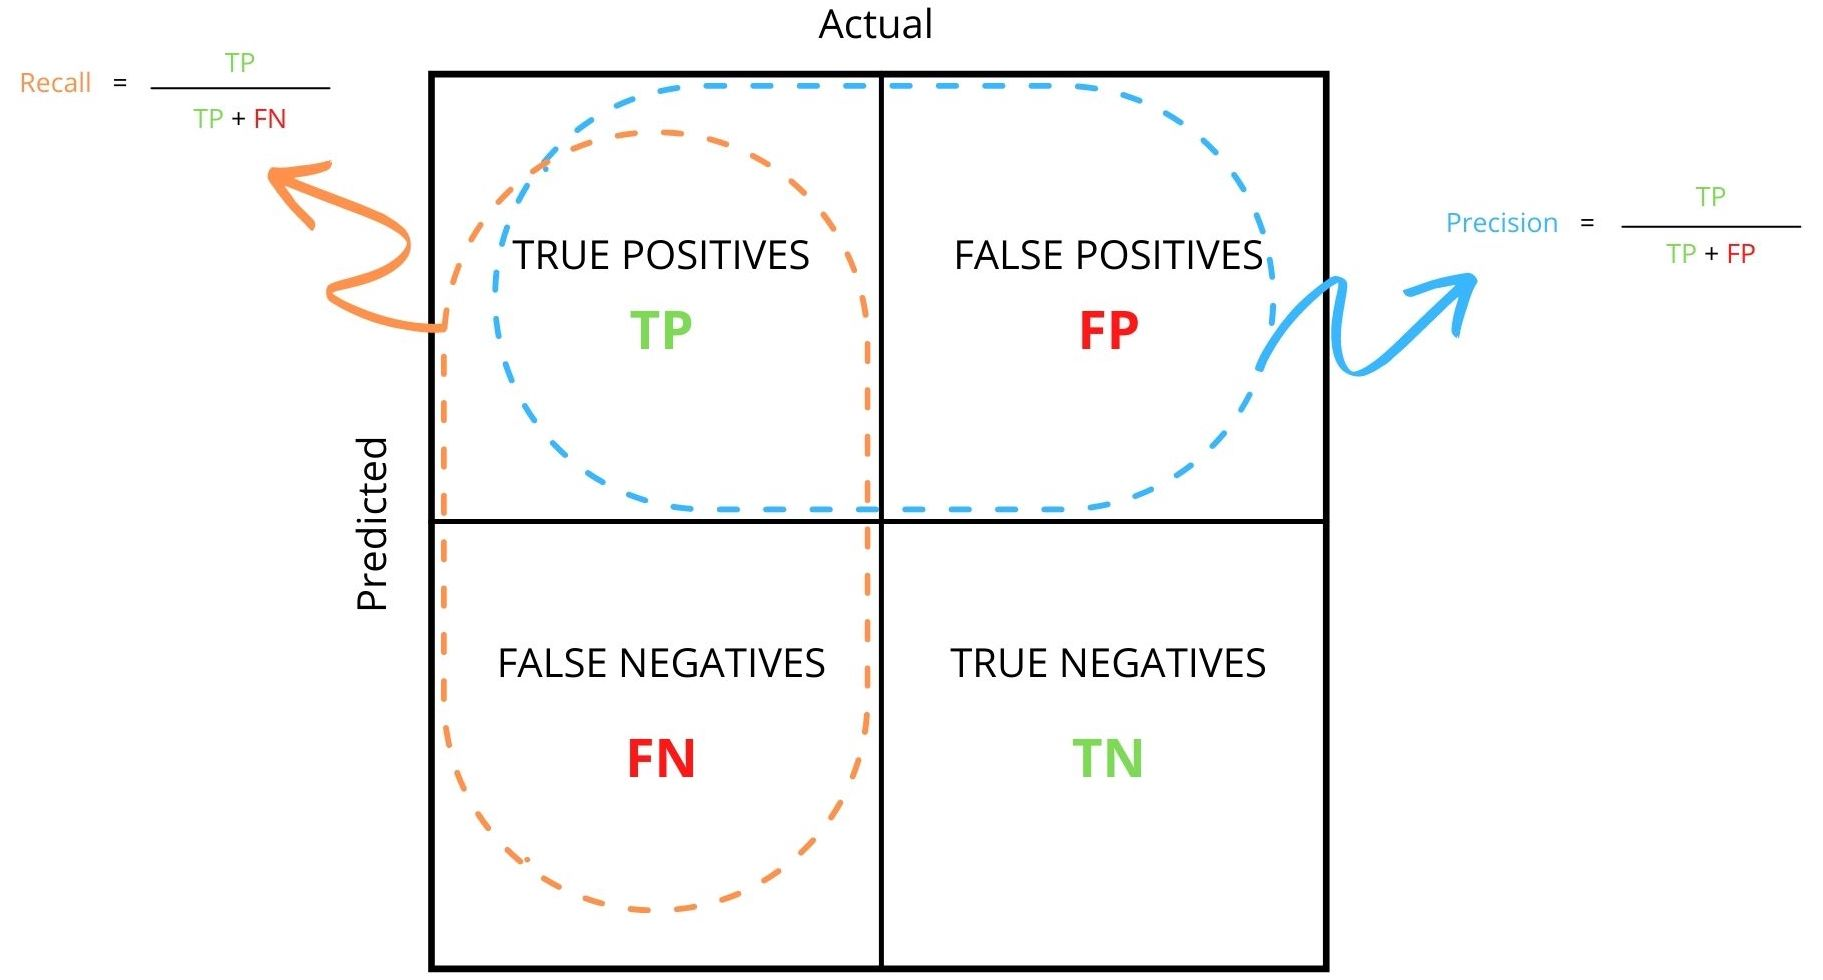

**Accuracy functions:**

mAP (mean Average Precision) compares the ground-truth bounding box to the detected box and returns a score. The higher the score, the more accurate the model is in its detections.

- mAP@ 0.5：when IoU is set to 0.5, the AP **[2]** of all pictures of each category is calculated, and then all categories are averaged : mAP
- mAP@ 0.5:0.95：represents the average mAP at different IoU thresholds (from 0.5 to 0.95 in steps of 0.05)

**[1] IoU (Intersection over Union)** = measures the overlap between two boundaries. It is used to measure how much the predicted boundary overlaps with the ground truth

*How to calculate IoU ?*

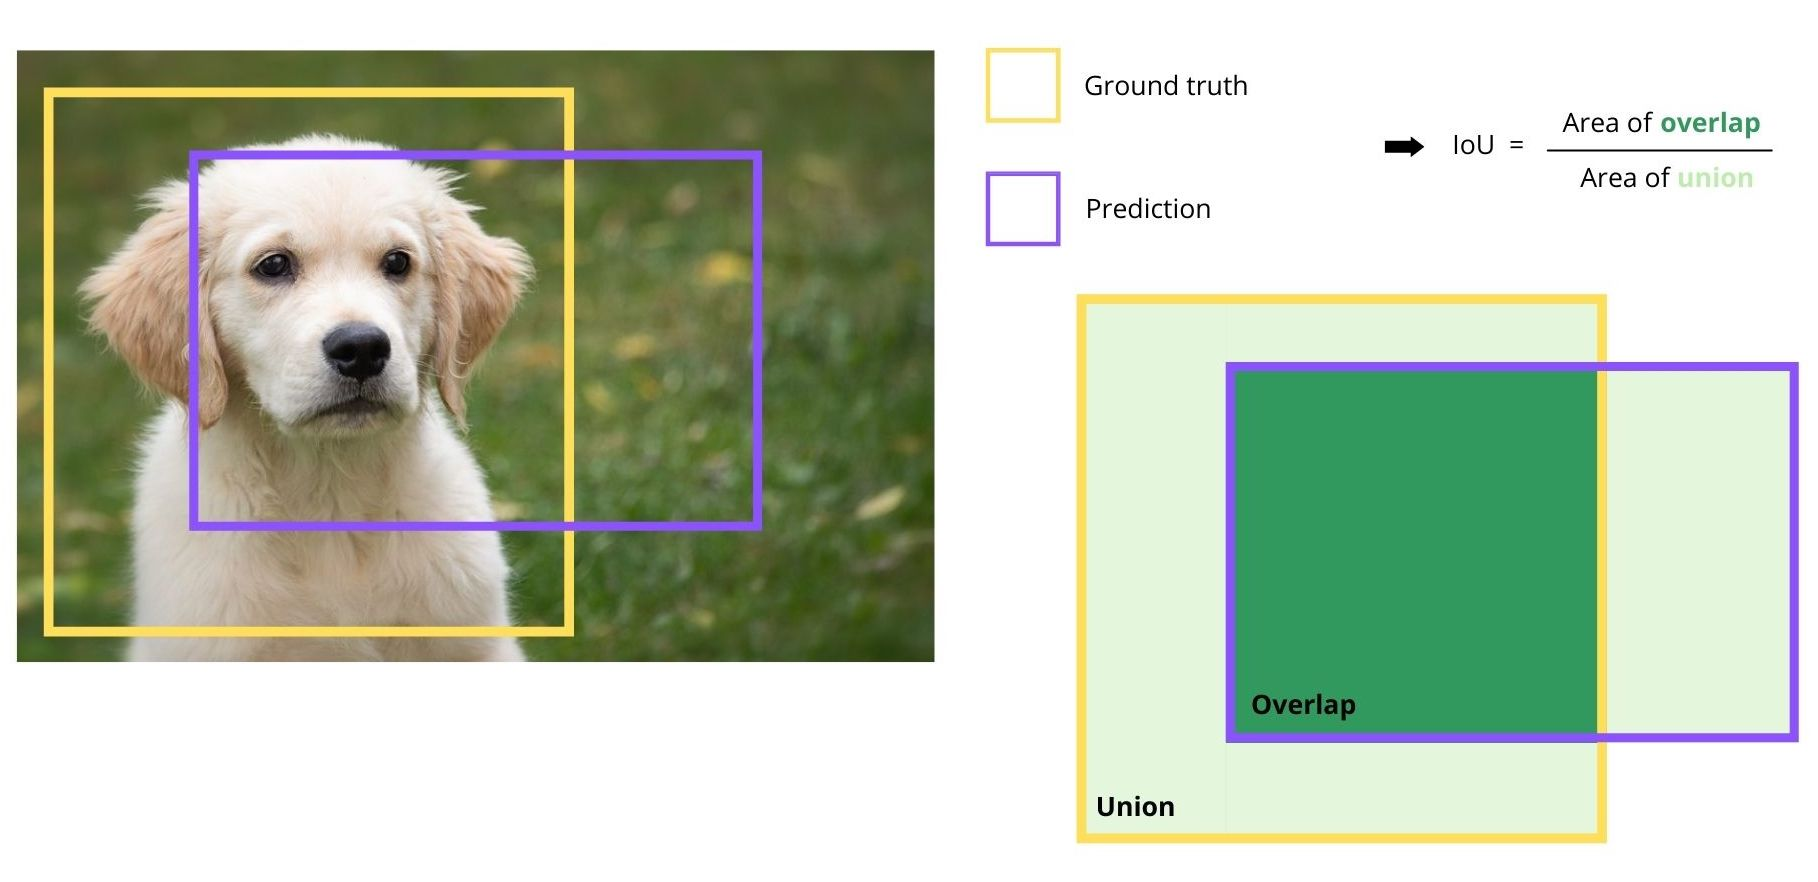

**[2] AP (Average precision)** = popular metric in measuring the accuracy of object detectors. It computes the average precision value for recall value over 0 to 1

### Run YOLOv5 inference on test images

Perform inference on the contents of the data/images folder. You can add the images of your choice in the same folder in order to perform tests.

In [15]:
# trained weights are saved in the weights folder
%ls /workspace/yolov5/runs/train/yolov5s_results/weights

best.pt  last.pt


In [16]:
# use the best weights and print the test images list
%cd /workspace/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source data/images --name yolov5s_results

/workspace/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov5s_results, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.5 torch-1.13.1+cu117 CUDA:0 (Tesla V100S-PCIE-32GB, 32510MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /workspace/yolov5/data/images/bus.jpg: 416x320 3 persons, 1 bus, 15.5ms
image 2/2 /workspace/yolov5/data/images/zidane.jpg: 256x416 2 persons, 16.1ms
Speed: 0.3ms pre-process, 15.8ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/yolov5s_results


In [ ]:
# display inference on all test images
# you can add some images in the folder named "data/images/" to test your model
import glob
from IPython.display import Image, display

for imageName in glob.glob('/workspace/yolov5/runs/detect/yolov5s_results/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

### Export trained weights for future inference

Weights after having train a YOLOv5s model on 100 epochs:

In [18]:
# firstly, rename it with the name you want
%cd /workspace/yolov5/runs/train/yolov5s_results/weights/
os.rename("best.pt","yolov5s_100epochs.pt")

/workspace/yolov5/runs/train/yolov5s_results/weights


In [20]:
# secondly, copy it in a new folder where you can put all the weights generated during your trainings
%cp /workspace/yolov5/runs/train/yolov5s_results/weights/yolov5s_100epochs.pt /workspace/models_train/yolov5s_100epochs.pt

## Conclusion

The yolov5s model has been trained on 100 epochs for almost 20 hours with two GPUs.

The performance results on the COCO database are as follows after 100 epochs:

**LOSS:**

- Box: 0.0506
- Objectness: 0.0497
- Clasification: 0.0219
- val Box: 0.0476
- val Objectness: 0.0345
- val Classification: 0.0176

**PRECISION & RECALL:**

- Precision: 0.6432
- Recall: 0.5067

**ACCURACY:**

- mAP @0.5: 0.5320
- mAP @0.5:0.95: 0.3469

=> We note that the losses are relatively low. The accuracies can however be better although the image tests seem to return correct results.

**How to improve results ?**

- First, by increasing the number of epochs (with care of overfitting)
- Second, by changing the batch size

*N.B: If the performance of the yolov5s model does not change with these modifications, it is possible to change the model (yolov5 s/m/l/x).*